In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_f = pd.read_csv("C:/Users/user/Desktop/thesis 202405/thesisdata.csv", low_memory=False)

In [4]:

# Get value counts and percentages
value_counts = data_f['loan_status'].value_counts()
percentages = data_f['loan_status'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
value_counts_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

# Display the result
print(value_counts_df)


                                                      Count  Percentage
loan_status                                                            
Fully Paid                                          1076751   47.629771
Current                                              878317   38.852100
Charged Off                                          268559   11.879630
Late (31-120 days)                                    21467    0.949587
In Grace Period                                        8436    0.373164
Late (16-30 days)                                      4349    0.192377
Does not meet the credit policy. Status:Fully Paid     1988    0.087939
Does not meet the credit policy. Status:Charged...      761    0.033663
Default                                                  40    0.001769


In [15]:
data_f.shape

(2260701, 151)

In [16]:
data = data_f[(data_f['loan_status'] == 'Fully Paid') | (data_f['loan_status'] == 'Charged Off')]

In [17]:
data.shape

(1345310, 151)

In [18]:
missing_count = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100)

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

print(missing_info)

                       Missing Count  Missing Percentage
id                                 0            0.000000
member_id                    1345310          100.000000
loan_amnt                          0            0.000000
funded_amnt                        0            0.000000
funded_amnt_inv                    0            0.000000
...                              ...                 ...
settlement_status            1312034           97.526518
settlement_date              1312034           97.526518
settlement_amount            1312034           97.526518
settlement_percentage        1312034           97.526518
settlement_term              1312034           97.526518

[151 rows x 2 columns]


In [19]:
threshold_percentage = 30

# Identify columns with more than 30% missing values
columns_to_drop = missing_info[missing_info['Missing Percentage'] > threshold_percentage].index

# Drop these columns from the dataset
data_1 = data.drop(columns=columns_to_drop)

               id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0        68407277     3600.0       3600.0           3600.0   36 months   
1        68355089    24700.0      24700.0          24700.0   36 months   
2        68341763    20000.0      20000.0          20000.0   60 months   
4        68476807    10400.0      10400.0          10400.0   60 months   
5        68426831    11950.0      11950.0          11950.0   36 months   
...           ...        ...          ...              ...         ...   
2260688  89905081    18000.0      18000.0          18000.0   60 months   
2260690  88948836    29400.0      29400.0          29400.0   60 months   
2260691  89996426    32000.0      32000.0          32000.0   60 months   
2260692  90006534    16000.0      16000.0          16000.0   60 months   
2260697  88224441    24000.0      24000.0          24000.0   60 months   

         int_rate  installment grade sub_grade                emp_title  ...  \
0           13.99       123.03 

In [20]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 93 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   funded_amnt                 1345310 non-null  float64
 3   funded_amnt_inv             1345310 non-null  float64
 4   term                        1345310 non-null  object 
 5   int_rate                    1345310 non-null  float64
 6   installment                 1345310 non-null  float64
 7   grade                       1345310 non-null  object 
 8   sub_grade                   1345310 non-null  object 
 9   emp_title                   1259525 non-null  object 
 10  emp_length                  1266799 non-null  object 
 11  home_ownership              1345310 non-null  object 
 12  annual_inc                  1345310 non-null  float64
 13  ve

In [23]:
# List of columns to select
selected_columns = [
    'id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
    'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
    'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'initial_list_status', 'last_credit_pull_d', 'last_fico_range_high',
    'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
    'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'bc_open_to_buy',
    'bc_util', 'delinq_amnt', 'chargeoff_within_12_mths', 'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_rev_tl',
    'percent_bc_gt_75', 'pct_tl_nvr_dlq', 'tot_hi_cred_lim', 'total_bal_ex_mort',
    'total_bc_limit'
]
# Assuming data_1 is your initial DataFrame
data_2 = data_1[selected_columns]

In [24]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 49 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   term                        1345310 non-null  object 
 3   int_rate                    1345310 non-null  float64
 4   installment                 1345310 non-null  float64
 5   grade                       1345310 non-null  object 
 6   sub_grade                   1345310 non-null  object 
 7   emp_length                  1266799 non-null  object 
 8   home_ownership              1345310 non-null  object 
 9   annual_inc                  1345310 non-null  float64
 10  verification_status         1345310 non-null  object 
 11  issue_d                     1345310 non-null  object 
 12  loan_status                 1345310 non-null  object 
 13  pu

In [25]:
# Assuming data_2 is your DataFrame containing the 'initial_list_status' column
value_counts_initial_list_status = data_2['initial_list_status'].value_counts()

# Print the counts of each unique value in the 'initial_list_status' column
print(value_counts_initial_list_status)


initial_list_status
w    784010
f    561300
Name: count, dtype: int64


Statistical Summary for Float Columns:
count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64
count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64
count    1.345310e+06
mean     4.380755e+02
std      2.615126e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64
count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64
count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000

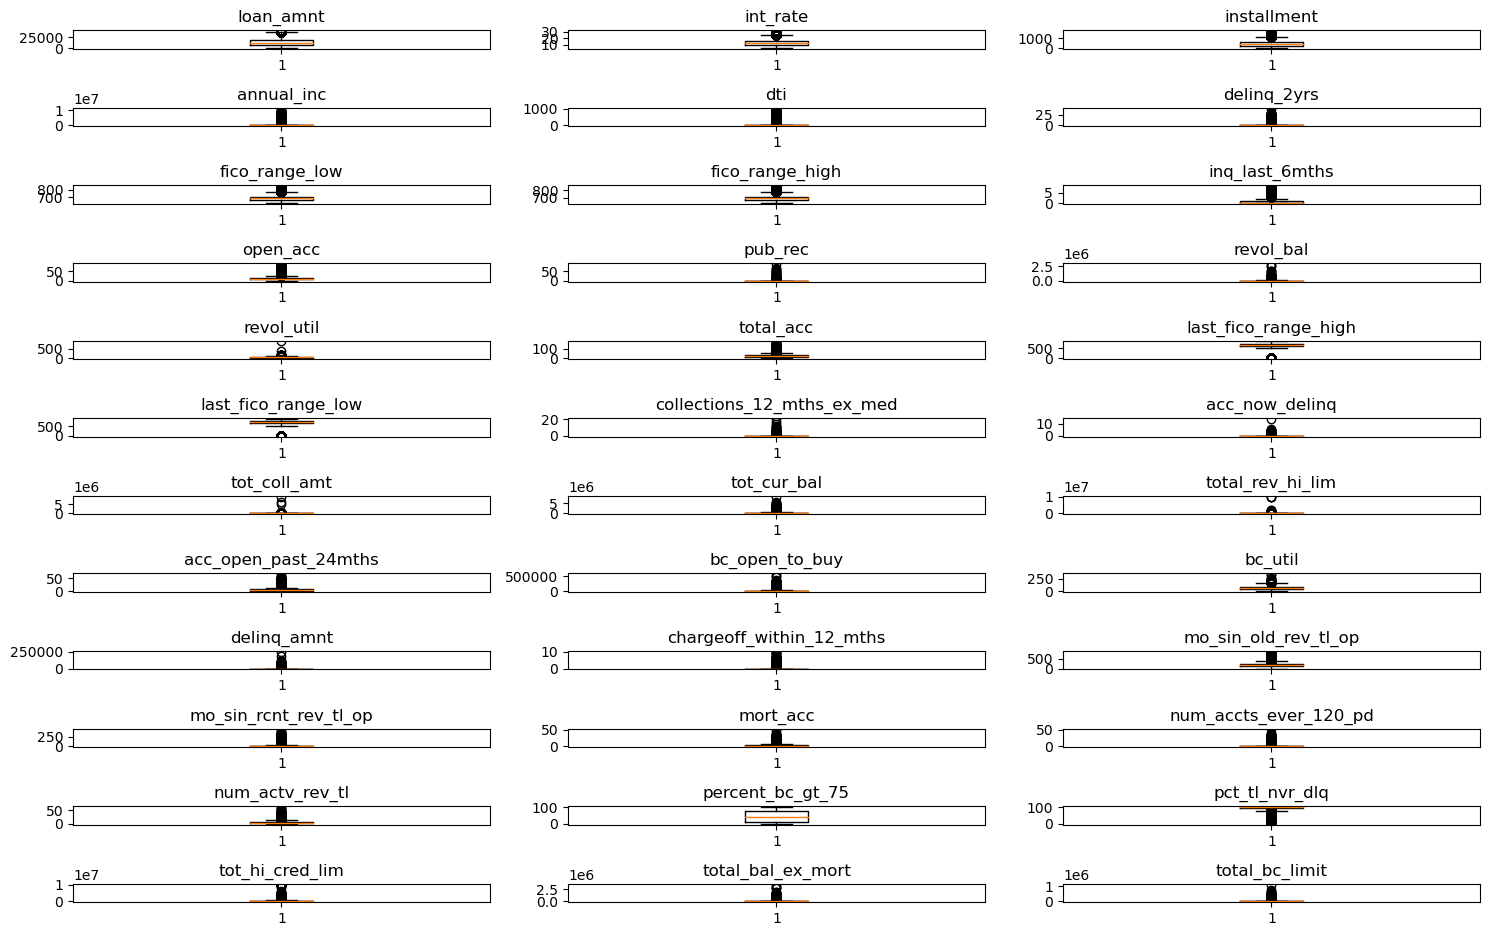

In [26]:

# Select only the columns of type 'float64'
float_columns = data_2.select_dtypes(include=['float64']).columns

# 1. Statistical Summary
print("Statistical Summary for Float Columns:")
for column in float_columns:
    print(data_2[column].describe())

# 2. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(float_columns):
    plt.subplot(len(float_columns) // 3 + 1, 3, i + 1)
    plt.boxplot(data_2[column].dropna())  # Drop NA values for plotting
    plt.title(column)
plt.tight_layout()
plt.show()


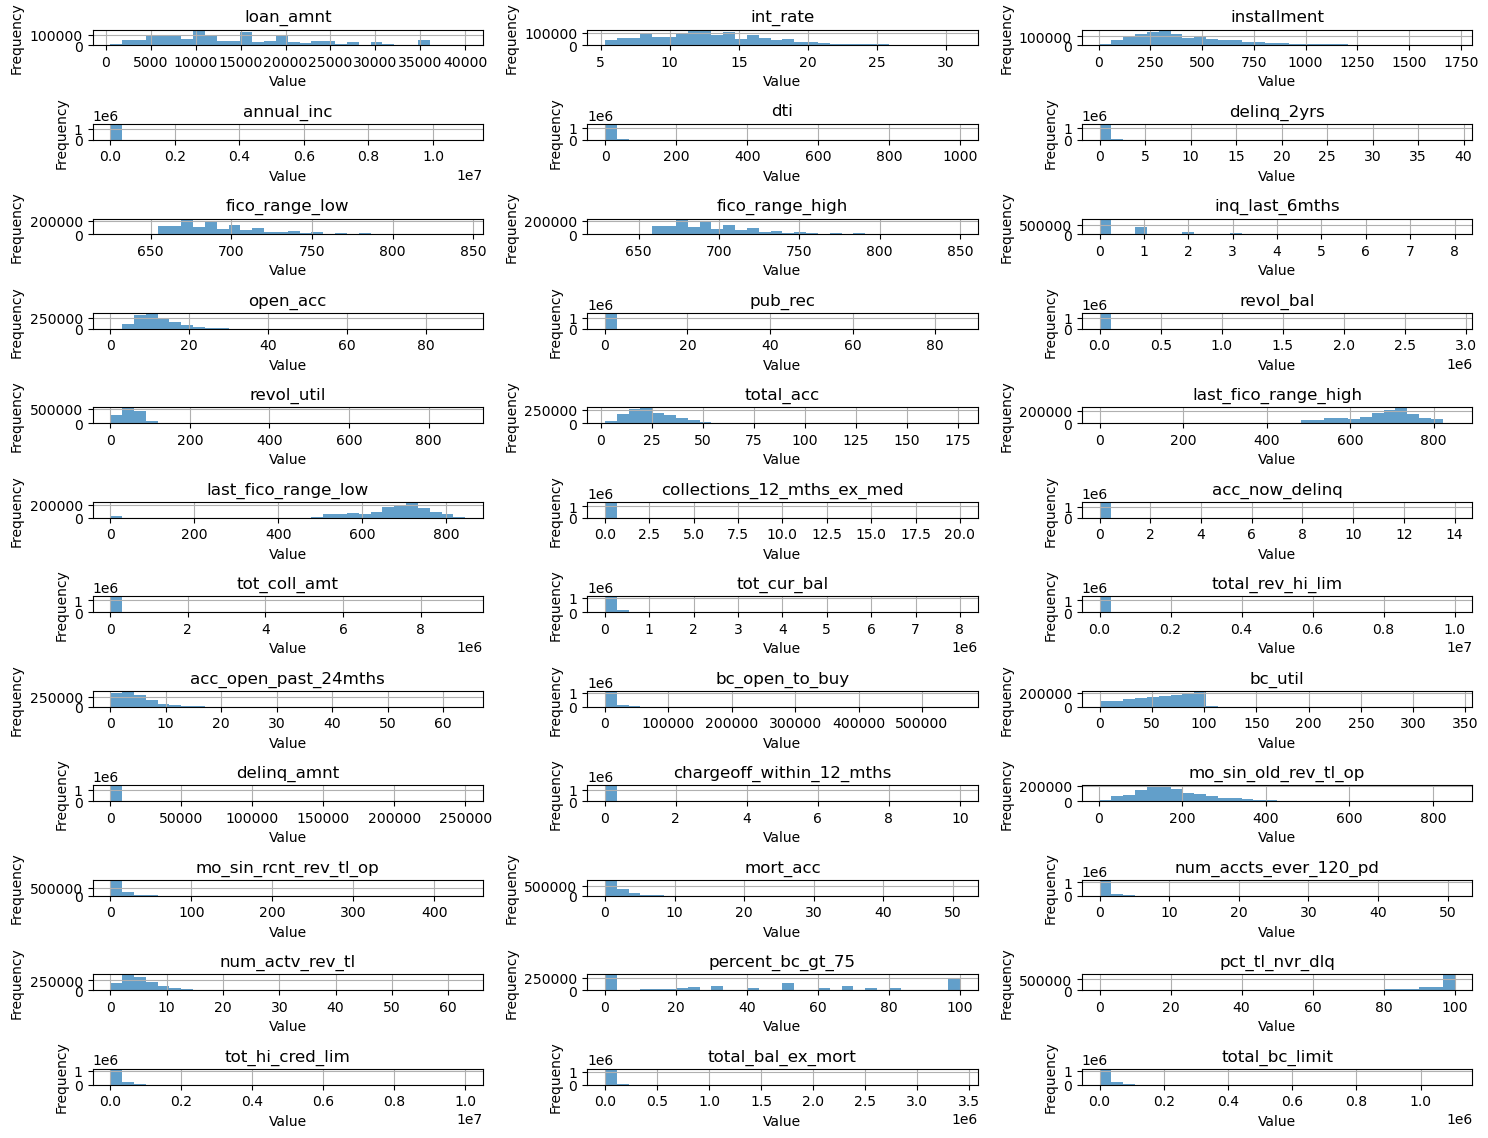

In [27]:
# Selecting only float columns from your DataFrame
float_columns = data_2.select_dtypes(include=['float64']).columns

# Set up the figure size and number of subplots based on the number of float columns
plt.figure(figsize=(15, 12))  # Adjust the size as needed
rows = len(float_columns) // 3 + 1  # Organize subplots in a grid

# Loop through all float columns and create a subplot for each histogram
for i, column in enumerate(float_columns):
    plt.subplot(rows, 3, i + 1)  # Adjust grid dimensions as necessary
    data_2[column].hist(bins=30, alpha=0.7)  # Adjust number of bins as needed
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()


In [28]:
# filling missing values for columns that are skewed or have outliers, and the mean for columns that have symmetric distributions
# Filling missing values based on distribution properties
# Using median due to skewness or outliers
median_fill_cols = [
    'dti', 'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
    'total_rev_hi_lim', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_accts_ever_120_pd',
    'num_actv_rev_tl', 'percent_bc_gt_75', 'total_bal_ex_mort', 'total_bc_limit',
    'annual_inc'
]

for col in median_fill_cols:
    data_2[col].fillna(data_2[col].median(), inplace=True)

# Using mean for symmetrical distributions
mean_fill_cols = ['fico_range_low', 'fico_range_high', 'int_rate', 'inq_last_6mths', 'open_acc']

for col in mean_fill_cols:
    data_2[col].fillna(data_2[col].mean(), inplace=True)

# Print a summary to confirm no more missing values
print(data_2.isnull().sum())


C:\Users\user\AppData\Local\Temp\ipykernel_27020\2276300564.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[col].fillna(data_2[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27020\2276300564.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[col].fillna(data_2[col].mean(), inplace=True)


id                                0
loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    78511
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_credit_pull_d               55
last_fico_range_high        

In [29]:
# Filling missing values for 'acc_open_past_24mths', 'pct_tl_nvr_dlq', 'tot_hi_cred_lim' with the median
data_2['acc_open_past_24mths'].fillna(data_2['acc_open_past_24mths'].median(), inplace=True)
data_2['pct_tl_nvr_dlq'].fillna(data_2['pct_tl_nvr_dlq'].median(), inplace=True)
data_2['tot_hi_cred_lim'].fillna(data_2['tot_hi_cred_lim'].median(), inplace=True)

# Check to confirm no more missing values
print(data_2[['acc_open_past_24mths', 'pct_tl_nvr_dlq', 'tot_hi_cred_lim']].isnull().sum())


acc_open_past_24mths    0
pct_tl_nvr_dlq          0
tot_hi_cred_lim         0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_27020\2869993648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['acc_open_past_24mths'].fillna(data_2['acc_open_past_24mths'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27020\2869993648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['pct_tl_nvr_dlq'].fillna(data_2['pct_tl_nvr_dlq'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27020\2869993648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [30]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 49 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1345310 non-null  object 
 1   loan_amnt                   1345310 non-null  float64
 2   term                        1345310 non-null  object 
 3   int_rate                    1345310 non-null  float64
 4   installment                 1345310 non-null  float64
 5   grade                       1345310 non-null  object 
 6   sub_grade                   1345310 non-null  object 
 7   emp_length                  1266799 non-null  object 
 8   home_ownership              1345310 non-null  object 
 9   annual_inc                  1345310 non-null  float64
 10  verification_status         1345310 non-null  object 
 11  issue_d                     1345310 non-null  object 
 12  loan_status                 1345310 non-null  object 
 13  pu

In [31]:
# Display unique values in the 'emp_length' column
unique_emp_lengths = data_2['emp_length'].unique()
print(unique_emp_lengths)

['10+ years' '3 years' '4 years' '6 years' '7 years' '8 years' '2 years'
 '5 years' '9 years' '< 1 year' '1 year' nan]


In [32]:
# Replacing values in the 'emp_length' column as specified
replacement_dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10
}

# Replace the values using the map function, fill NaN with -1 after mapping
data_2['emp_length'] = data_2['emp_length'].map(replacement_dict).fillna(-1)

# Check the changes by viewing the unique values of the column
data_2['emp_length'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_27020\2524755311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['emp_length'] = data_2['emp_length'].map(replacement_dict).fillna(-1)


array([10.,  3.,  4.,  6.,  7.,  8.,  2.,  5.,  9.,  0.,  1., -1.])

In [56]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 69 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   id                                   1345310 non-null  object        
 1   loan_amnt                            1345310 non-null  float64       
 2   term                                 1345310 non-null  int32         
 3   int_rate                             1345310 non-null  float64       
 4   installment                          1345310 non-null  float64       
 5   grade                                1345310 non-null  object        
 6   sub_grade                            1345310 non-null  int64         
 7   emp_length                           1345310 non-null  float64       
 8   annual_inc                           1345310 non-null  float64       
 9   issue_d                              1345310 non-null  datetim

In [34]:
# Performing one-hot encoding on the specified columns
data_2 = pd.get_dummies(data_2, columns=['home_ownership', 'verification_status', 'purpose', 'initial_list_status'])
# Display the first few rows of the updated DataFrame to confirm changes
data_2.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,68407277,3600.0,36 months,13.99,123.03,C,C4,10.0,55000.0,Dec-2015,...,False,False,False,False,False,False,False,False,False,True
1,68355089,24700.0,36 months,11.99,820.28,C,C1,10.0,65000.0,Dec-2015,...,False,False,False,False,False,True,False,False,False,True
2,68341763,20000.0,60 months,10.78,432.66,B,B4,10.0,63000.0,Dec-2015,...,False,False,False,False,False,False,False,False,False,True
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3.0,104433.0,Dec-2015,...,True,False,False,False,False,False,False,False,False,True
5,68426831,11950.0,36 months,13.44,405.18,C,C3,4.0,34000.0,Dec-2015,...,False,False,False,False,False,False,False,False,False,True


In [36]:
# List of all columns that need to be converted from bool to int
bool_columns = [
    'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 
    'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 
    'verification_status_Not Verified', 'verification_status_Source Verified', 
    'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 
    'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 
    'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 
    'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 
    'purpose_vacation', 'purpose_wedding', 'initial_list_status_f', 'initial_list_status_w'
]

# Converting each bool column to int
for column in bool_columns:
    data_2[column] = data_2[column].astype(int)

In [38]:

unique_emp_lengths = data_2['term'].unique()
print(unique_emp_lengths)

[' 36 months' ' 60 months']


In [39]:

unique_emp_lengths = data_2['sub_grade'].unique()
print(unique_emp_lengths)

['C4' 'C1' 'B4' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3' 'C5'
 'A1' 'D4' 'F3' 'D1' 'B3' 'D3' 'D5' 'A5' 'F2' 'E4' 'D2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5']


In [40]:
unique_emp_lengths = data_2['loan_status'].unique()
print(unique_emp_lengths)

['Fully Paid' 'Charged Off']


In [41]:
unique_emp_lengths = data_2['earliest_cr_line'].unique()
print(unique_emp_lengths)

['Aug-2003' 'Dec-1999' 'Aug-2000' 'Jun-1998' 'Oct-1987' 'Jun-1990'
 'Feb-1999' 'Apr-2002' 'Nov-1994' 'Jun-1996' 'Jun-2005' 'May-1984'
 'Dec-2001' 'Nov-1993' 'Mar-2005' 'May-2004' 'Jun-1991' 'May-2000'
 'Oct-2011' 'May-1994' 'Jul-2011' 'May-1991' 'May-2001' 'Jun-2002'
 'Dec-1985' 'Apr-2007' 'Feb-2002' 'Jun-2001' 'Oct-1996' 'Jan-2005'
 'Jul-2001' 'Aug-2004' 'Jun-2007' 'Jul-2004' 'Apr-2001' 'May-1992'
 'Oct-1999' 'Nov-2001' 'Jan-2001' 'Sep-2004' 'Sep-2006' 'Oct-2002'
 'Feb-1990' 'Aug-1987' 'Oct-1998' 'Aug-2001' 'Feb-2004' 'Aug-2009'
 'Jan-1999' 'Jun-2000' 'Jan-2007' 'Aug-1997' 'Dec-1987' 'Feb-1996'
 'Jun-2004' 'Jun-1995' 'Oct-2004' 'Dec-2002' 'Aug-1986' 'Nov-2002'
 'Oct-2006' 'Sep-2000' 'Feb-2012' 'Apr-2005' 'Sep-1994' 'Apr-1993'
 'Sep-2007' 'Jan-1998' 'May-2008' 'Mar-2001' 'Apr-1994' 'Apr-2003'
 'Jan-2002' 'Jan-2011' 'Nov-2000' 'May-2002' 'Nov-2003' 'Sep-2003'
 'Aug-2008' 'Dec-1997' 'May-2006' 'Nov-2009' 'Oct-1994' 'May-1985'
 'Sep-2002' 'Jun-1999' 'Nov-2006' 'Nov-1996' 'Feb-2000' 'Jan-1

In [42]:
unique_emp_lengths = data_2['last_credit_pull_d'].unique()
print(unique_emp_lengths)

['Mar-2019' 'Mar-2018' 'May-2017' 'Nov-2018' 'Sep-2018' 'Nov-2017'
 'Aug-2018' 'Apr-2017' 'Jun-2016' 'Jan-2018' 'Sep-2017' 'Dec-2017'
 'Jul-2016' 'Jan-2019' 'Jun-2017' 'Feb-2019' 'Dec-2018' 'Feb-2018'
 'Aug-2017' 'Feb-2017' 'May-2018' 'Dec-2016' 'Apr-2018' 'Jul-2018'
 'Mar-2016' 'Jun-2018' 'Oct-2017' 'Jul-2017' 'Oct-2018' 'Jan-2017'
 'Oct-2016' 'Apr-2016' 'Mar-2017' 'Aug-2016' 'Feb-2016' 'Nov-2016'
 'Sep-2016' 'Jan-2016' 'Dec-2015' 'May-2016' nan 'Nov-2015' 'Oct-2015'
 'Sep-2015' 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015'
 'Mar-2015' 'Feb-2015' 'Jan-2015' 'Dec-2014' 'Nov-2014' 'Oct-2014'
 'Sep-2014' 'Aug-2014' 'Jul-2014' 'Jun-2014' 'May-2014' 'Apr-2014'
 'Mar-2014' 'Feb-2014' 'Jan-2014' 'Sep-2012' 'Jun-2012' 'Dec-2012'
 'Feb-2013' 'Feb-2012' 'Nov-2013' 'Apr-2012' 'May-2013' 'Aug-2012'
 'Sep-2013' 'Jan-2012' 'Oct-2013' 'May-2012' 'Jul-2012' 'Jun-2013'
 'Dec-2013' 'Nov-2012' 'Mar-2013' 'Apr-2013' 'Jul-2013' 'Mar-2012'
 'Aug-2013' 'Oct-2012' 'Nov-2011' 'Dec-2011' 'Oct-2011' 'S

In [43]:
data_2['term'] = data_2['term'].str.extract('(\d+)')
# Convert the extracted strings to integers
data_2['term'] = data_2['term'].astype(int)

In [45]:
# Create a mapping from sub_grade to numbers
sub_grade_mapping = {grade: i + 1 for i, grade in enumerate(
    ['A1', 'A2', 'A3', 'A4', 'A5',
     'B1', 'B2', 'B3', 'B4', 'B5',
     'C1', 'C2', 'C3', 'C4', 'C5',
     'D1', 'D2', 'D3', 'D4', 'D5',
     'E1', 'E2', 'E3', 'E4', 'E5',
     'F1', 'F2', 'F3', 'F4', 'F5',
     'G1', 'G2', 'G3', 'G4', 'G5'])}

# Apply the mapping to the 'sub_grade' column
data_2['sub_grade'] = data_2['sub_grade'].map(sub_grade_mapping)

In [47]:
# Create a mapping for the 'loan_status' column
loan_status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1
}
# Apply the mapping to the 'loan_status' column
data_2['loan_status'] = data_2['loan_status'].map(loan_status_mapping)

In [48]:
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'], format='%b-%Y')
data_2['earliest_cr_line'] = pd.to_datetime(data_2['earliest_cr_line'], format='%b-%Y')

# Calculate the difference in months between 'issue_d' and 'earliest_cr_line'
data_2['credit_history_length'] = (data_2['issue_d'] - data_2['earliest_cr_line']) / pd.Timedelta(days=30)

# Convert the difference in months to integer
data_2['credit_history_length'] = data_2['credit_history_length'].astype(int)

# Optionally, you can replace 'earliest_cr_line' with the new values if needed
data_2['earliest_cr_line'] = data_2['credit_history_length']

In [50]:
# Convert 'last_credit_pull_d' and 'issue_d' to datetime format
data_2['last_credit_pull_d'] = pd.to_datetime(data_2['last_credit_pull_d'], format='%b-%Y')
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'], format='%b-%Y')

# Calculate the difference in months between 'last_credit_pull_d' and 'issue_d'
data_2['time_since_issue'] = (data_2['last_credit_pull_d'] - data_2['issue_d']) / pd.Timedelta(days=30)

# Fill missing values with 0
data_2['time_since_issue'] = data_2['time_since_issue'].fillna(0)

# Convert the difference in months to integer
data_2['time_since_issue'] = data_2['time_since_issue'].astype(int)

In [52]:
# Calculate the mean of 'fico_range_low' and 'fico_range_high'
data_2['fico_range_mean'] = (data_2['fico_range_low'] + data_2['fico_range_high']) / 2

In [53]:
# Calculate the mean of 'last_fico_range_high' and 'last_fico_range_low'
data_2['last_fico_range_mean'] = (data_2['last_fico_range_high'] + data_2['last_fico_range_low']) / 2

In [55]:
# Dropping the specified columns from data_2
data_2 = data_2.drop(['last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'fico_range_low', 'fico_range_high'], axis=1)

In [57]:
data_2.to_csv('cleaned_data.csv', index=False)

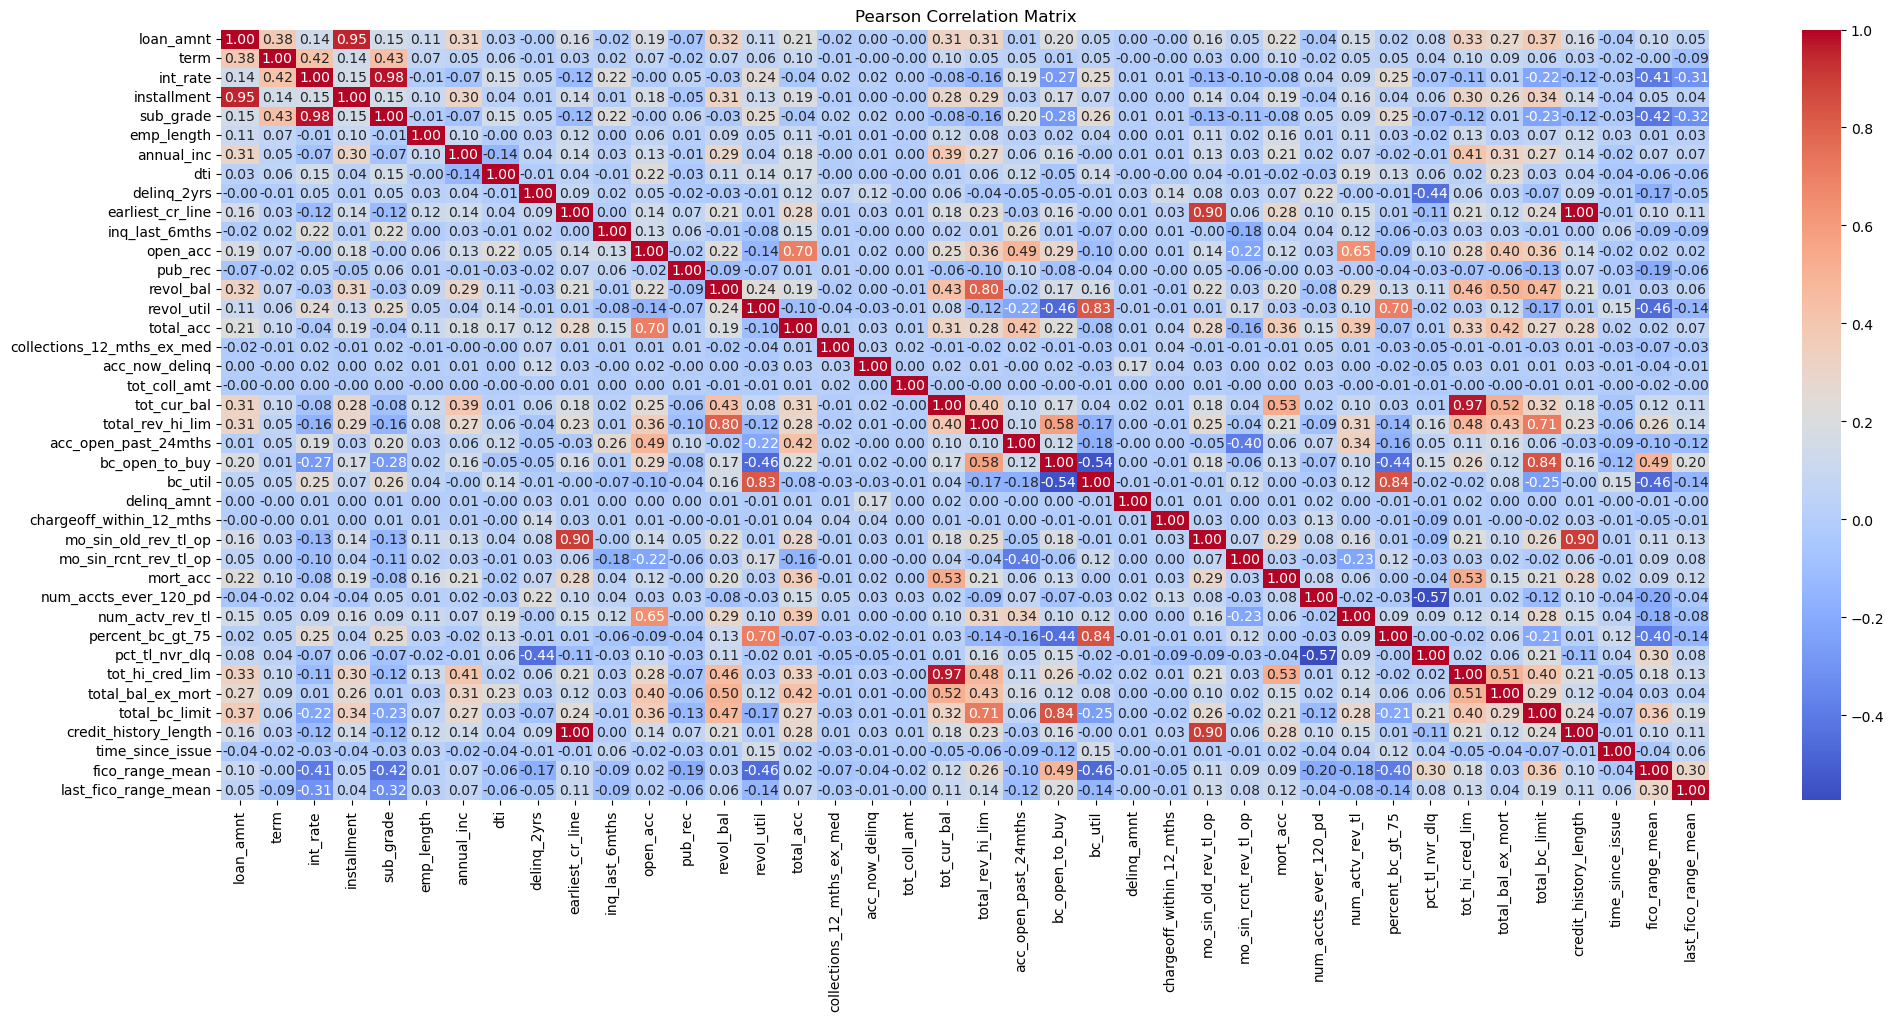

In [59]:
# List of columns you want to analyze
columns = [
    "loan_amnt", "term", "int_rate", "installment", 
    "sub_grade", "emp_length", "annual_inc", "dti", "delinq_2yrs",
    "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec",
    "revol_bal", "revol_util", "total_acc", "collections_12_mths_ex_med",
    "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim",
    "acc_open_past_24mths", "bc_open_to_buy", "bc_util", "delinq_amnt",
    "chargeoff_within_12_mths", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mort_acc", "num_accts_ever_120_pd", "num_actv_rev_tl", "percent_bc_gt_75",
    "pct_tl_nvr_dlq", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "credit_history_length", "time_since_issue", "fico_range_mean",
    "last_fico_range_mean"
]

# Select only the specified columns for correlation analysis
df_selected = data_2[columns]

# Calculate the Pearson correlation matrix
correlation_matrix = df_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

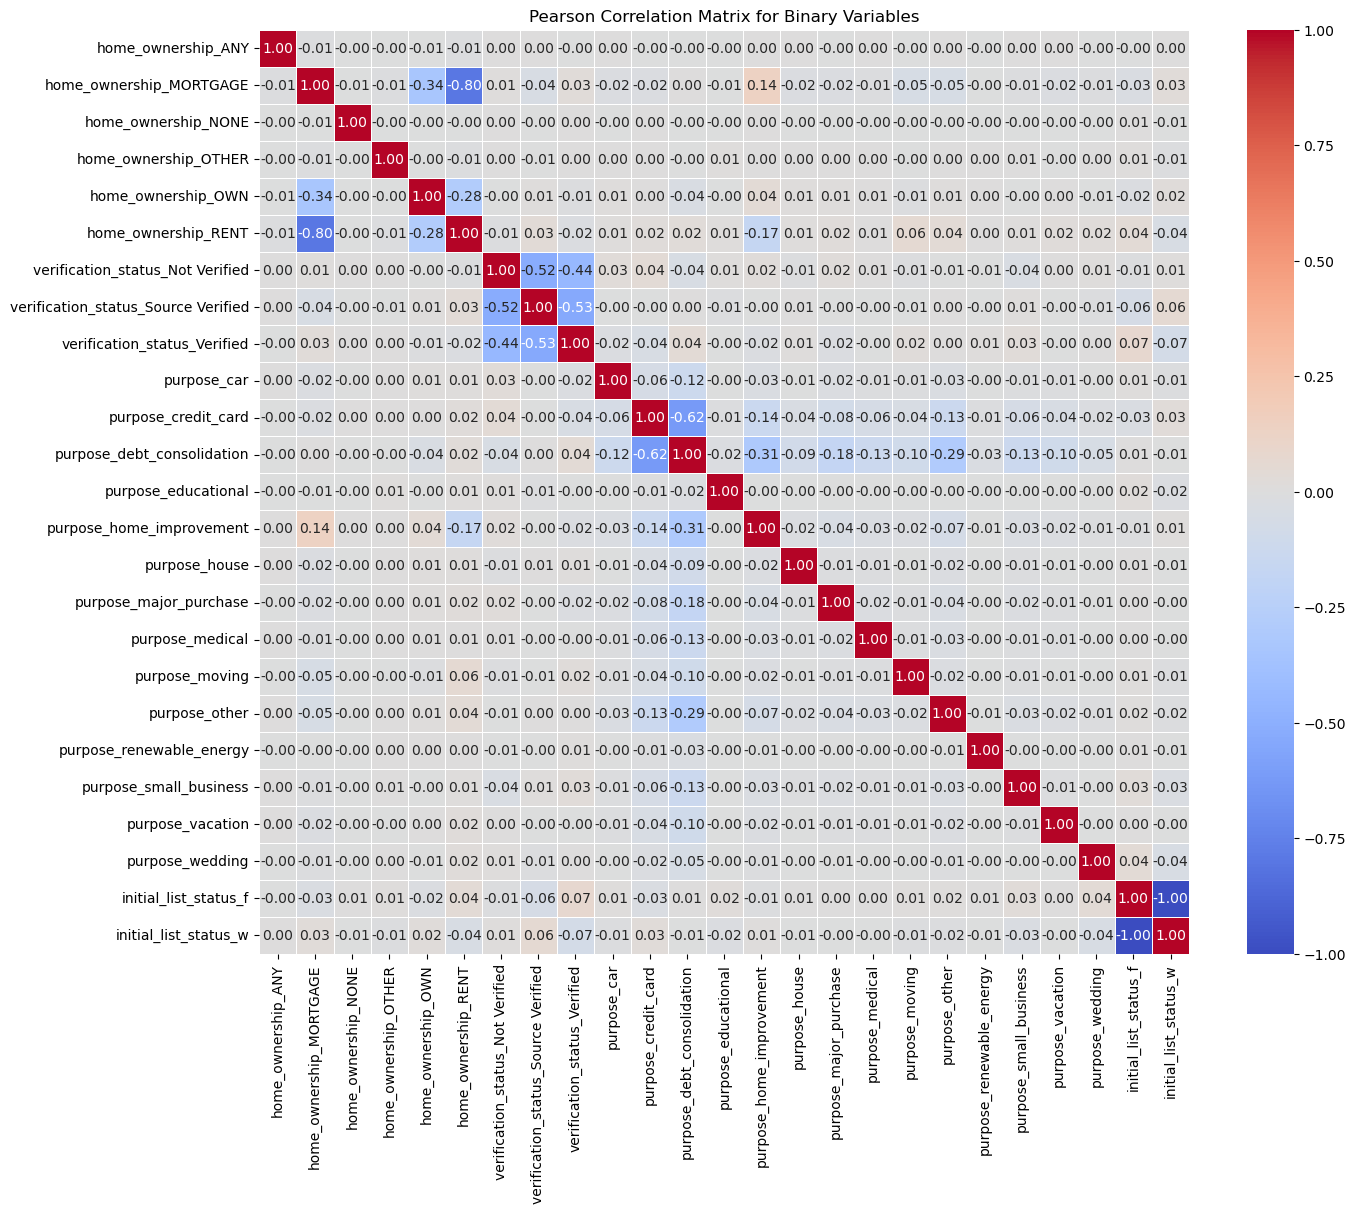

In [64]:
import seaborn as sns

# List only the binary variables
binary_columns = [
    "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE", 
    "home_ownership_OTHER", "home_ownership_OWN", "home_ownership_RENT",
    "verification_status_Not Verified", "verification_status_Source Verified", "verification_status_Verified",
    "purpose_car", "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational",
    "purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical",
    "purpose_moving", "purpose_other", "purpose_renewable_energy", "purpose_small_business",
    "purpose_vacation", "purpose_wedding", "initial_list_status_f", "initial_list_status_w"
]

# Select only the binary columns for correlation analysis
df_binary = data_2[binary_columns]

# Calculate the Pearson correlation matrix for binary variables
correlation_matrix_binary = df_binary.corr()

# Plot the correlation matrix with numeric annotations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_binary, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Matrix for Binary Variables')
plt.show()

              precision    recall  f1-score   support

 Non-Default       0.90      0.99      0.94      3166
     Default       0.68      0.20      0.31       447

    accuracy                           0.89      3613
   macro avg       0.79      0.59      0.63      3613
weighted avg       0.87      0.89      0.86      3613

Top 10 important features:
last_fico_range_mean     0.166377
time_since_issue         0.131987
annual_inc               0.049077
revol_bal                0.047879
installment              0.047175
revol_util               0.046604
int_rate                 0.045920
dti                      0.045148
earliest_cr_line         0.043112
credit_history_length    0.042540
dtype: float64


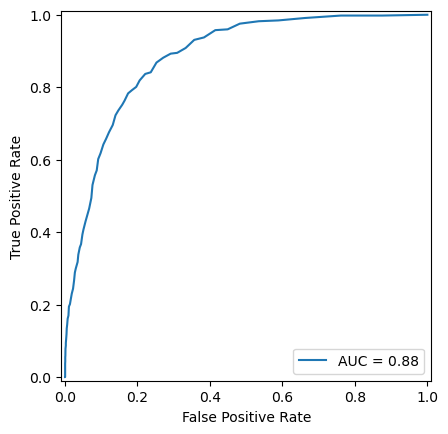

In [71]:
# simple random forest to derive feature importance 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# List of columns to use, including binary variables
columns = [
    "loan_amnt", "term", "int_rate", "installment", "sub_grade", "emp_length", "annual_inc",
    "dti", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec",
    "revol_bal", "revol_util", "total_acc", "collections_12_mths_ex_med", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "acc_open_past_24mths", "bc_open_to_buy",
    "bc_util", "delinq_amnt", "chargeoff_within_12_mths", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mort_acc", "num_accts_ever_120_pd", "num_actv_rev_tl", "percent_bc_gt_75", "pct_tl_nvr_dlq",
    "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "credit_history_length",
    "time_since_issue", "fico_range_mean", "last_fico_range_mean",
    "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER",
    "home_ownership_OWN", "home_ownership_RENT", "verification_status_Not Verified",
    "verification_status_Source Verified", "verification_status_Verified", "purpose_car",
    "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational",
    "purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical",
    "purpose_moving", "purpose_other", "purpose_renewable_energy", "purpose_small_business",
    "purpose_vacation", "purpose_wedding", "initial_list_status_f", "initial_list_status_w"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Splitting the dataset into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # probability estimates for ROC curve

# Evaluation metrics
print(classification_report(y_test, y_pred, target_names=['Non-Default', 'Default']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 important features:")
print(feature_importance.head(10))

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87914149 0.88180065 0.88727843 0.88307956 0.88767919]
Average ROC AUC score: 0.8837958617632214
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      3166
           1       0.34      0.83      0.49       447

    accuracy                           0.78      3613
   macro avg       0.66      0.80      0.68      3613
weighted avg       0.89      0.78      0.82      3613

All feature importances:
last_fico_range_mean     0.212968
time_since_issue         0.191086
int_rate                 0.046900
annual_inc               0.040828
revol_util               0.039323
                           ...   
num_actv_rev_tl          0.000000
percent_bc_gt_75         0.000000
tot_hi_cred_lim          0.000000
total_bal_ex_mort        0.000000
initial_list_status_w    0.000000
Length: 65, dtype: float64


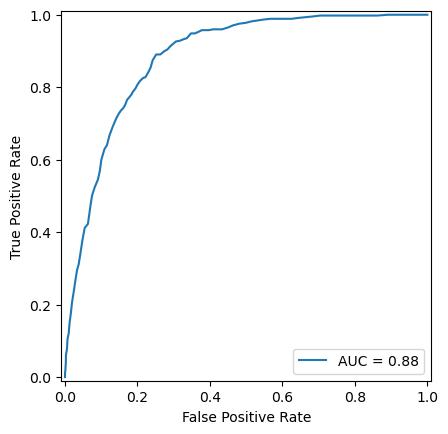

In [73]:
# simple random forest with undersampling to derive feature importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# List of columns to use
columns = [
    "loan_amnt", "term", "int_rate", "installment", "sub_grade", "emp_length", "annual_inc",
    "dti", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec",
    "revol_bal", "revol_util", "total_acc", "collections_12_mths_ex_med", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "acc_open_past_24mths", "bc_open_to_buy",
    "bc_util", "delinq_amnt", "chargeoff_within_12_mths", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mort_acc", "num_accts_ever_120_pd", "num_actv_rev_tl", "percent_bc_gt_75", "pct_tl_nvr_dlq",
    "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "credit_history_length",
    "time_since_issue", "fico_range_mean", "last_fico_range_mean",
    # Additional binary variables as needed
    "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER",
    "home_ownership_OWN", "home_ownership_RENT", "verification_status_Not Verified",
    "verification_status_Source Verified", "verification_status_Verified", "purpose_car",
    "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational",
    "purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical",
    "purpose_moving", "purpose_other", "purpose_renewable_energy", "purpose_small_business",
    "purpose_vacation", "purpose_wedding", "initial_list_status_f", "initial_list_status_w"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

plt.show()




C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.8676242  0.87892712 0.87810146 0.86703995 0.88576769]
Average ROC AUC score: 0.8754920812400183
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3166
           1       0.53      0.34      0.42       447

    accuracy                           0.88      3613
   macro avg       0.72      0.65      0.67      3613
weighted avg       0.86      0.88      0.87      3613

Important features:
last_fico_range_mean     0.205592
time_since_issue         0.129338
inq_last_6mths           0.068253
term                     0.048122
int_rate                 0.037331
                           ...   
num_actv_rev_tl          0.000000
percent_bc_gt_75         0.000000
tot_hi_cred_lim          0.000000
total_bal_ex_mort        0.000000
initial_list_status_w    0.000000
Length: 65, dtype: float64


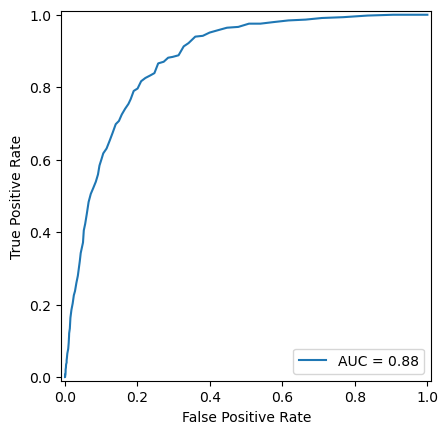

In [75]:
#simple random forest with smote to drive feature importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# List of columns to use
columns = [
     "loan_amnt", "term", "int_rate", "installment", "sub_grade", "emp_length", "annual_inc",
    "dti", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec",
    "revol_bal", "revol_util", "total_acc", "collections_12_mths_ex_med", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "acc_open_past_24mths", "bc_open_to_buy",
    "bc_util", "delinq_amnt", "chargeoff_within_12_mths", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op",
    "mort_acc", "num_accts_ever_120_pd", "num_actv_rev_tl", "percent_bc_gt_75", "pct_tl_nvr_dlq",
    "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit", "credit_history_length",
    "time_since_issue", "fico_range_mean", "last_fico_range_mean",
    "home_ownership_ANY", "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER",
    "home_ownership_OWN", "home_ownership_RENT", "verification_status_Not Verified",
    "verification_status_Source Verified", "verification_status_Verified", "purpose_car",
    "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational",
    "purpose_home_improvement", "purpose_house", "purpose_major_purchase", "purpose_medical",
    "purpose_moving", "purpose_other", "purpose_renewable_energy", "purpose_small_business",
    "purpose_vacation", "purpose_wedding", "initial_list_status_f", "initial_list_status_w"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first applies SMOTE and then trains a RandomForest classifier
smote = SMOTE(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Important features:")
print(feature_importance)

# Save feature importance to a CSV file
feature_importance_df = pd.DataFrame({'Variable': feature_importance.index, 'Importance': feature_importance.values})
feature_importance_df.to_csv('feature_importance.csv', index=False)

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87645702 0.88038638 0.88603002 0.88257096 0.89092257]
Average ROC AUC score: 0.883273390086454
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      3166
           1       0.35      0.86      0.50       447

    accuracy                           0.79      3613
   macro avg       0.66      0.82      0.68      3613
weighted avg       0.90      0.79      0.82      3613

All feature importances:
last_fico_range_mean                   0.238672
time_since_issue                       0.211484
int_rate                               0.043203
annual_inc                             0.041116
revol_util                             0.039149
revol_bal                              0.039140
dti                                    0.036737
installment                            0.036555
credit_history_length                  0.035516
sub_grade                              0.035099
tota

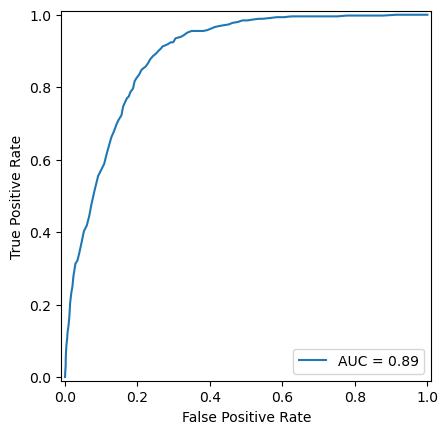

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Update list of columns to use based on the feature importance provided
columns = [
    "last_fico_range_mean", "time_since_issue", "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "sub_grade", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "loan_amnt", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

plt.show()


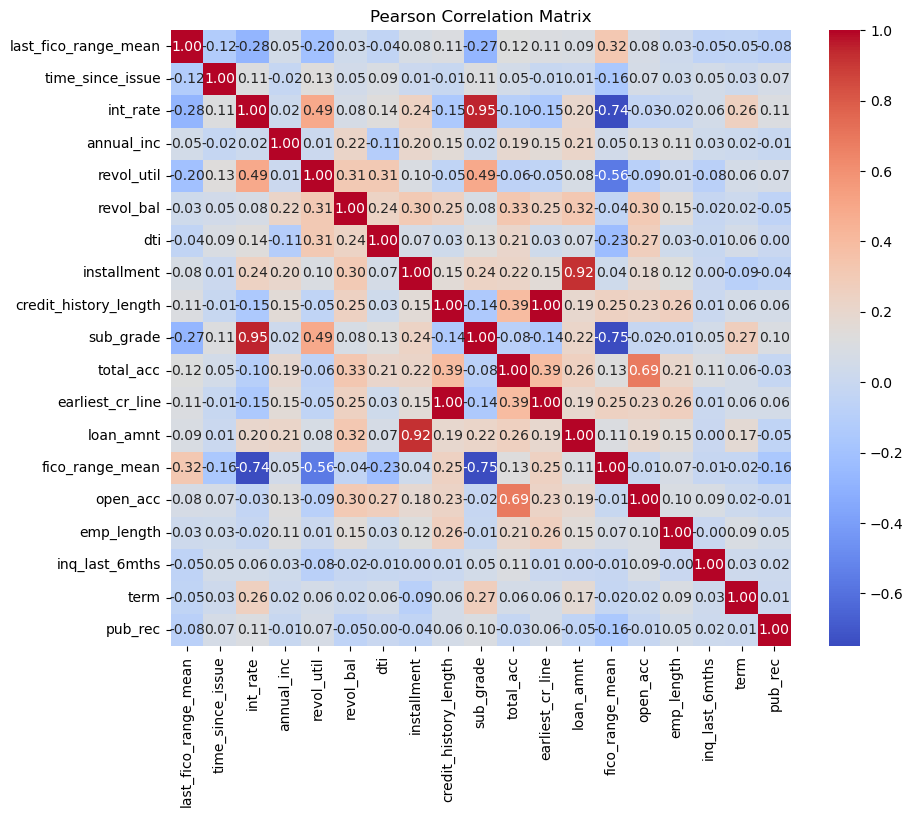

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# List of columns to use for Pearson correlation
columns = [
    "last_fico_range_mean", "time_since_issue", "int_rate", "annual_inc",
    "revol_util", "revol_bal", "dti", "installment", "credit_history_length",
    "sub_grade", "total_acc", "earliest_cr_line", "loan_amnt", "fico_range_mean",
    "open_acc", "emp_length", "inq_last_6mths", "term", "pub_rec"
]

# Selecting only the relevant features
X = filtered_data[columns]

# Calculating the Pearson correlation matrix
correlation_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Pearson Correlation Matrix')
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87623574 0.88550102 0.89149286 0.88751951 0.89203463]
Average ROC AUC score: 0.8865567502273388
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3166
           1       0.34      0.85      0.49       447

    accuracy                           0.78      3613
   macro avg       0.66      0.81      0.67      3613
weighted avg       0.89      0.78      0.81      3613

All feature importances:
last_fico_range_mean                   0.234039
time_since_issue                       0.219352
int_rate                               0.059414
annual_inc                             0.044682
installment                            0.044292
revol_bal                              0.042407
revol_util                             0.042092
dti                                    0.039667
earliest_cr_line                       0.036975
credit_history_length                  0.036750
tot

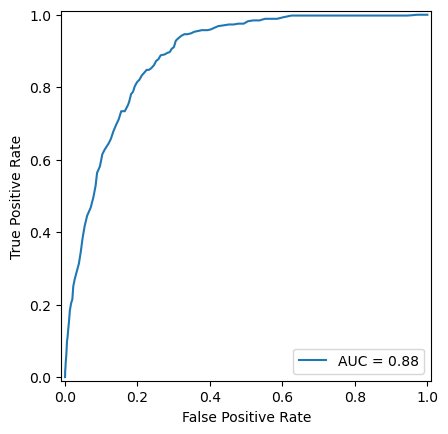

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Update list of columns to use based on the feature importance provided
columns = [
    "last_fico_range_mean", "time_since_issue", "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length",  "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.64857951 0.663169   0.66254193 0.64106592 0.65522462]
Average ROC AUC score: 0.6541161953589965
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      3166
           1       0.19      0.65      0.29       447

    accuracy                           0.60      3613
   macro avg       0.55      0.62      0.51      3613
weighted avg       0.83      0.60      0.67      3613

All feature importances:
int_rate                               0.083166
annual_inc                             0.082442
revol_util                             0.073609
revol_bal                              0.072572
dti                                    0.071268
installment                            0.068614
credit_history_length                  0.063459
earliest_cr_line                       0.061845
sub_grade                              0.058597
total_acc                              0.058125
loa

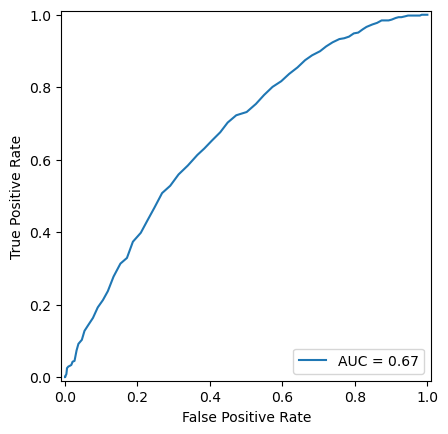

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Update list of columns to use based on the feature importance provided
columns = [
     "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "sub_grade", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "loan_amnt", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.64857951 0.663169   0.66254193 0.64106592 0.65522462]
Average ROC AUC score: 0.6541161953589965
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      3166
           1       0.19      0.65      0.29       447

    accuracy                           0.60      3613
   macro avg       0.55      0.62      0.51      3613
weighted avg       0.83      0.60      0.67      3613

All feature importances:
int_rate                               0.083166
annual_inc                             0.082442
revol_util                             0.073609
revol_bal                              0.072572
dti                                    0.071268
installment                            0.068614
credit_history_length                  0.063459
earliest_cr_line                       0.061845
sub_grade                              0.058597
total_acc                              0.058125
loa

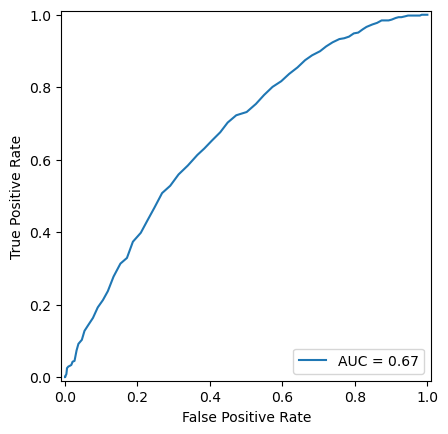

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Update list of columns to use based on the feature importance provided
columns = [
    "inq_last_6mths", "term", "int_rate", "annual_inc", "emp_length", "sub_grade", 
    "fico_range_mean", "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT", "total_acc", "loan_amnt",
    "earliest_cr_line", "credit_history_length", "verification_status_Source Verified", 
    "open_acc", "purpose_debt_consolidation", "verification_status_Verified", 
    "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

# Print the average predicted probability (PD) of default on the test set
average_pd = np.mean(y_prob)
print(f"Average Predicted Probability of Default (PD) on the test set: {average_pd:.4f}")

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87623574 0.88550102 0.89149286 0.88751951 0.89203463]
Average ROC AUC score: 0.8865567502273388
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3166
           1       0.34      0.85      0.49       447

    accuracy                           0.78      3613
   macro avg       0.66      0.81      0.67      3613
weighted avg       0.89      0.78      0.81      3613

All feature importances:
last_fico_range_mean                   0.234039
time_since_issue                       0.219352
int_rate                               0.059414
annual_inc                             0.044682
installment                            0.044292
revol_bal                              0.042407
revol_util                             0.042092
dti                                    0.039667
earliest_cr_line                       0.036975
credit_history_length                  0.036750
tot

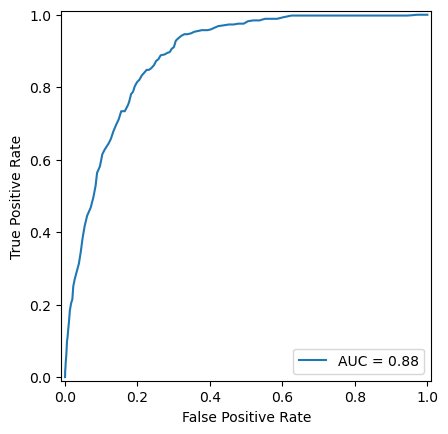

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Update list of columns to use based on the feature importance provided
columns = [
    "last_fico_range_mean", "time_since_issue", "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length",  "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87623574 0.88550102 0.89149286 0.88751951 0.89203463]
Average ROC AUC score: 0.8865567502273388
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3166
           1       0.34      0.85      0.49       447

    accuracy                           0.78      3613
   macro avg       0.66      0.81      0.67      3613
weighted avg       0.89      0.78      0.81      3613

All feature importances:
last_fico_range_mean                   0.234039
time_since_issue                       0.219352
int_rate                               0.059414
annual_inc                             0.044682
installment                            0.044292
revol_bal                              0.042407
revol_util                             0.042092
dti                                    0.039667
earliest_cr_line                       0.036975
credit_history_length                  0.036750
tot

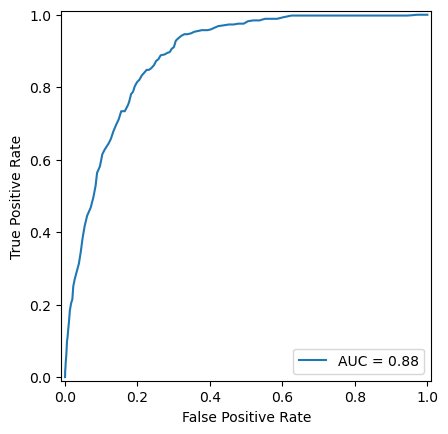

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assume data_2 is your DataFrame already loaded with the data
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# List of columns to use, specified as per your feature importance
columns = [
    "last_fico_range_mean", "time_since_issue", "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Selecting features and target
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline that first undersamples and then trains a RandomForest classifier
undersampler = RandomUnderSampler(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline([
    ('undersample', undersampler),
    ('classifier', rf)
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

# Calculate and print the average PD on the test set
average_pd = np.mean(y_prob)
print(f"Average Predicted Probability of Default (PD) on the test set: {average_pd:.4f}")

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.87007753 0.88169826 0.88602691 0.87515566 0.88999974]
Average ROC AUC score: 0.8805916200858664
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3166
           1       0.52      0.39      0.44       447

    accuracy                           0.88      3613
   macro avg       0.72      0.67      0.69      3613
weighted avg       0.87      0.88      0.87      3613

All feature importances:
last_fico_range_mean                   0.234039
time_since_issue                       0.219352
int_rate                               0.059414
annual_inc                             0.044682
installment                            0.044292
revol_bal                              0.042407
revol_util                             0.042092
dti                                    0.039667
earliest_cr_line                       0.036975
credit_history_length                  0.036750
tot

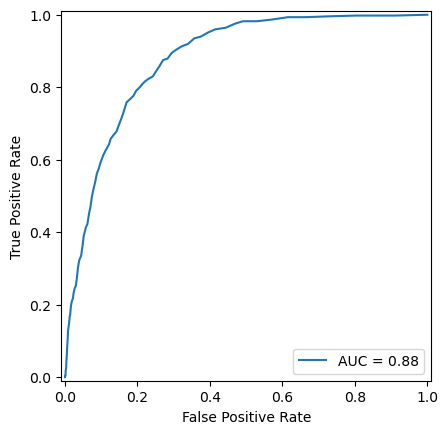

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load and preprocess data
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Specify columns
columns = [
    "last_fico_range_mean", "time_since_issue", "inq_last_6mths", "term",
    "int_rate", "annual_inc", "emp_length", "fico_range_mean",
    "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT",
    "total_acc", "earliest_cr_line", "credit_history_length",
    "verification_status_Source Verified", "open_acc", "purpose_debt_consolidation",
    "verification_status_Verified", "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Data selection
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampling and undersampling methods
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Define a pipeline with SMOTE and RandomUnderSampler before training a RandomForest classifier
pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersampler),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

# Calculate and print the average PD on the test set
average_pd = np.mean(y_prob)
print(f"Average Predicted Probability of Default (PD) on the test set: {average_pd:.4f}")

plt.show()


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


ROC AUC scores for each fold:
[0.66297768 0.6468581  0.66619125 0.62326827 0.66689945]
Average ROC AUC score: 0.653238950474677
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3166
           1       0.17      0.02      0.03       447

    accuracy                           0.87      3613
   macro avg       0.52      0.50      0.48      3613
weighted avg       0.79      0.87      0.82      3613

All feature importances:
inq_last_6mths                         0.129607
term                                   0.087789
int_rate                               0.060290
annual_inc                             0.045540
home_ownership_RENT                    0.042142
verification_status_Source Verified    0.041868
verification_status_Verified           0.040465
revol_bal                              0.037478
home_ownership_MORTGAGE                0.036668
revol_util                             0.036658
veri

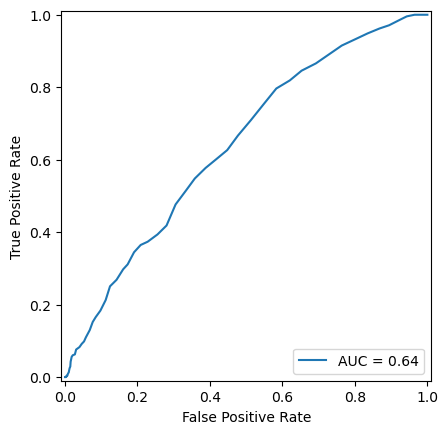

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load and preprocess data
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Specify columns based on feature importance
columns = [
    "inq_last_6mths", "term", "int_rate", "annual_inc", "emp_length", "sub_grade", 
    "fico_range_mean", "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT", "total_acc", "loan_amnt",
    "earliest_cr_line", "credit_history_length", "verification_status_Source Verified", 
    "open_acc", "purpose_debt_consolidation", "verification_status_Verified", 
    "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Data selection
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampling and undersampling methods
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Define a pipeline with SMOTE and RandomUnderSampler before training a RandomForest classifier
pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersampler),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring function
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=roc_auc_scorer, n_jobs=-1)

print("ROC AUC scores for each fold:")
print(cv_scores)
print("Average ROC AUC score:", np.mean(cv_scores))

# Train the model on the full training dataset and evaluate on the test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(pipeline.named_steps['classifier'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

# Calculate and print the average PD on the test set
average_pd = np.mean(y_prob)
print(f"Average Predicted Probability of Default (PD) on the test set: {average_pd:.4f}")

plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3166
           1       0.19      0.02      0.03       447

    accuracy                           0.87      3613
   macro avg       0.54      0.50      0.48      3613
weighted avg       0.79      0.87      0.82      3613

All feature importances:
inq_last_6mths                         0.131484
term                                   0.085876
int_rate                               0.059182
annual_inc                             0.045564
verification_status_Verified           0.043340
verification_status_Source Verified    0.042349
home_ownership_RENT                    0.040681
home_ownership_MORTGAGE                0.037902
verifi

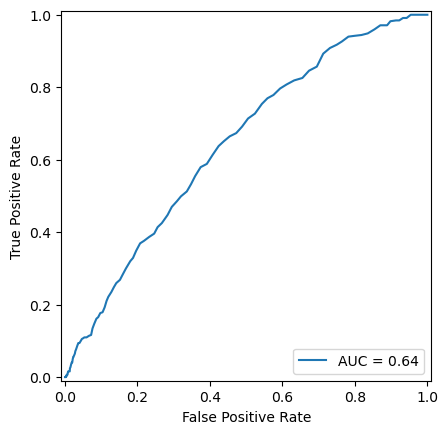

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, auc, RocCurveDisplay, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load and preprocess data
data_2['issue_d'] = pd.to_datetime(data_2['issue_d'])
filtered_data = data_2[data_2['issue_d'].dt.year.isin(range(2007, 2011))]

# Specify columns based on feature importance
columns = [
    "inq_last_6mths", "term", "int_rate", "annual_inc", "emp_length", "sub_grade", 
    "fico_range_mean", "revol_bal", "revol_util", "home_ownership_MORTGAGE", "installment",
    "verification_status_Not Verified", "dti", "home_ownership_RENT", "total_acc", "loan_amnt",
    "earliest_cr_line", "credit_history_length", "verification_status_Source Verified", 
    "open_acc", "purpose_debt_consolidation", "verification_status_Verified", 
    "purpose_credit_card", "home_ownership_OWN", "pub_rec"
]

# Data selection
X = filtered_data[columns]
y = filtered_data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampling and undersampling methods
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Define a pipeline with SMOTE, RandomUnderSampler, and RandomForest classifier
pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersampler),
    ('classifier', rf)
])

# Hyperparameters grid to be tuned
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Setup cross-validation with GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

# Predictions with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# ROC Curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Feature Importance for all features
feature_importance = pd.Series(best_model.named_steps['classifier'].feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("All feature importances:")
print(feature_importance)

# Calculate and print the average PD on the test set
average_pd = np.mean(y_prob)
print(f"Average Predicted Probability of Default (PD) on the test set: {average_pd:.4f}")

plt.show()


In [87]:
from joblib import dump, load

# Save the best model
dump(best_model, 'best_random_forest_model.joblib')


['best_random_forest_model.joblib']

In [88]:
# Load the model
loaded_model = load('best_random_forest_model.joblib')

# Filter data for the years 2012 to 2018
new_data = data_2[data_2['issue_d'].dt.year.isin(range(2012, 2018))]
new_X = new_data[columns]  # Ensure the columns match those used during training

# Make predictions
new_y_pred = loaded_model.predict(new_X)
new_y_prob = loaded_model.predict_proba(new_X)[:, 1]

# Print Predicted Classes and Predicted Probabilities (PD)
print("Predicted Classes:", new_y_pred)
print("Predicted Probabilities of Default (PD):", new_y_prob)

# Calculate and print the average PD for this new dataset
average_new_pd = np.mean(new_y_prob)
print(f"Average Predicted Probability of Default (PD) on the new dataset: {average_new_pd:.4f}")


Predicted Classes: [0 0 0 ... 0 0 0]
Predicted Probabilities of Default (PD): [0.235 0.37  0.22  ... 0.355 0.305 0.325]
Average Predicted Probability of Default (PD) on the new dataset: 0.2335


Classification Report on New Data:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89    995191
           1       0.38      0.02      0.03    254022

    accuracy                           0.79   1249213
   macro avg       0.59      0.51      0.46   1249213
weighted avg       0.71      0.79      0.71   1249213



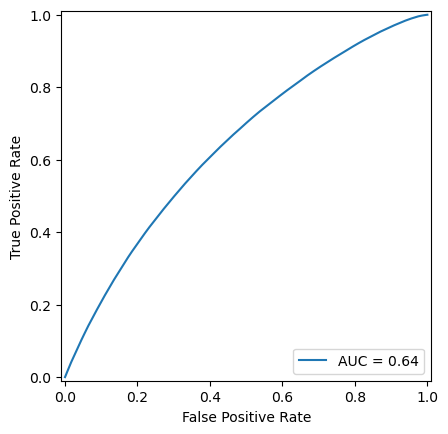

In [89]:
if 'loan_status' in new_data.columns:  # Assuming the true labels are available
    new_y = new_data['loan_status']
    # Evaluation metrics
    print("Classification Report on New Data:")
    print(classification_report(new_y, new_y_pred))

    # ROC Curve for new data
    new_fpr, new_tpr, new_thresholds = roc_curve(new_y, new_y_prob)
    new_roc_auc = auc(new_fpr, new_tpr)
    RocCurveDisplay(fpr=new_fpr, tpr=new_tpr, roc_auc=new_roc_auc).plot()
    plt.show()
